# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016.
____

## Imports

In [1]:
#Pandas datareader allows to read stock information directly from the internet
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

**Getting Financial Data from Internet (Yahoo)**

---
We will get stock information for the following banks:
*  Bank of America (BAC)
* CitiGroup (C)
* Goldman Sachs (GS)
* JPMorgan Chase (JPM)
* Morgan Stanley (MS)
* Wells Fargo (WFC)

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
BAC = data.DataReader("BAC", "yahoo", start, end)

In [4]:
C = data.DataReader("C", "yahoo", start, end)

In [5]:
GS = data.DataReader("GS", "yahoo", start, end)

In [6]:
JPM = data.DataReader("JPM", "yahoo", start, end)

In [7]:
MS = data.DataReader("MS", "yahoo", start, end)

In [8]:
WFC = data.DataReader("WFC", "yahoo", start, end)

In [9]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,361.662109
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,354.985107
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,356.746002
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,356.746002
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,355.058411


**Combine DataFrames into a Multiindex DataFrame**

** Create a list of the ticker symbols for the keys argument & concatenate the bank dataframes to a single data frame **

In [10]:
tickers = ['BAC', 'GS', 'C','JPM', 'MS', 'WFC']

In [11]:
bank_stocks = pd.concat([BAC, C, GS,JPM, MS, WFC], axis = 1, keys = tickers)

In [12]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584064   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227402   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270203   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220268   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241684   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.193916   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.070746   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.202719   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.000362   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  14.806809   

                    GS                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558956  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583366  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680927  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717514  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095585  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  27.602324  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  27.338882  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  27.661814  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  27.389868  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.032942  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242823  
2006-01-04  31.530001  10870000.0  20.008032  
2006-01-05  31.495001  10158000.0  19.985819  
2006-01-06  31.680000   8403800.0  20.103218  
2006-01-09  31.674999   5619600.0  20.100039  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  45.304951  
2015-12-28  54.680000   8288800.0  45.189247  
2015-12-29  55.290001   7894900.0  45.693367  
2015-12-30  54.889999   8016900.0  45.362797  
2015-12-31  54.360001  10929800.0  44.924797  

[2517 rows

** Set the column name levels **

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [14]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                     GS                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584064  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227402  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270203  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220268  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241684  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558956  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583366  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680927  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717514  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095585  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242823  
2006-01-04   31.799999  31.530001  10870000.0  20.008032  
2006-01-05   31.500000  31.495001  10158000.0  19.985819  
2006-01-06   31.580000  31.680000   8403800.0  20.103218  
2006-01-09   31.674999  31.674999   5619600.0  20.100039  

[5 rows x 36 columns]

# Exploratory Data Analysis
---

**Research Question: What is the max Close price for each bank's stock throughout the time period?**

In [15]:
bank_stocks.xs(key = 'Close', axis = 1, level='Stock Info').head()

Bank Ticker,BAC,GS,C,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


<AxesSubplot:xlabel='Date'>

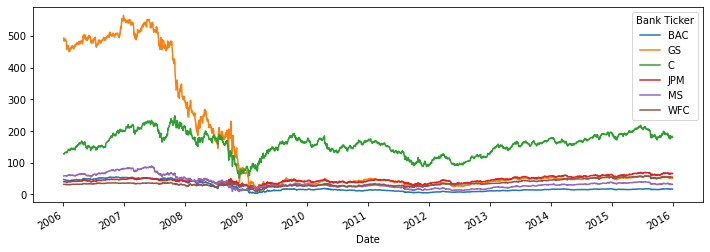

In [16]:
bank_stocks.xs(key ='Close', axis = 1, level = 'Stock Info').plot(figsize = (12,4))

** For a more interactive Experiance **

In [17]:
bank_stocks.xs(key ='Close', axis = 1, level = 'Stock Info').iplot()

**Research Question: What is the *return* for each bank's stock throughout the time period?**

This can be simply done by applying the pct.change() method on the close columns. The pct.change() method does the following applies the following transformation

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
returns = bank_stocks.xs(key = 'Close', axis = 1, level='Stock Info').apply(lambda x: x.pct_change())
returns.rename(columns = lambda x: x + ' Returns', inplace = True)

In [20]:
returns.head()

Bank Ticker,BAC Returns,GS Returns,C Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


## Lets Dig a bit deeper into the returns data

** Lets start with creating a pairplot to take a look at the patterns across the entire dataset **

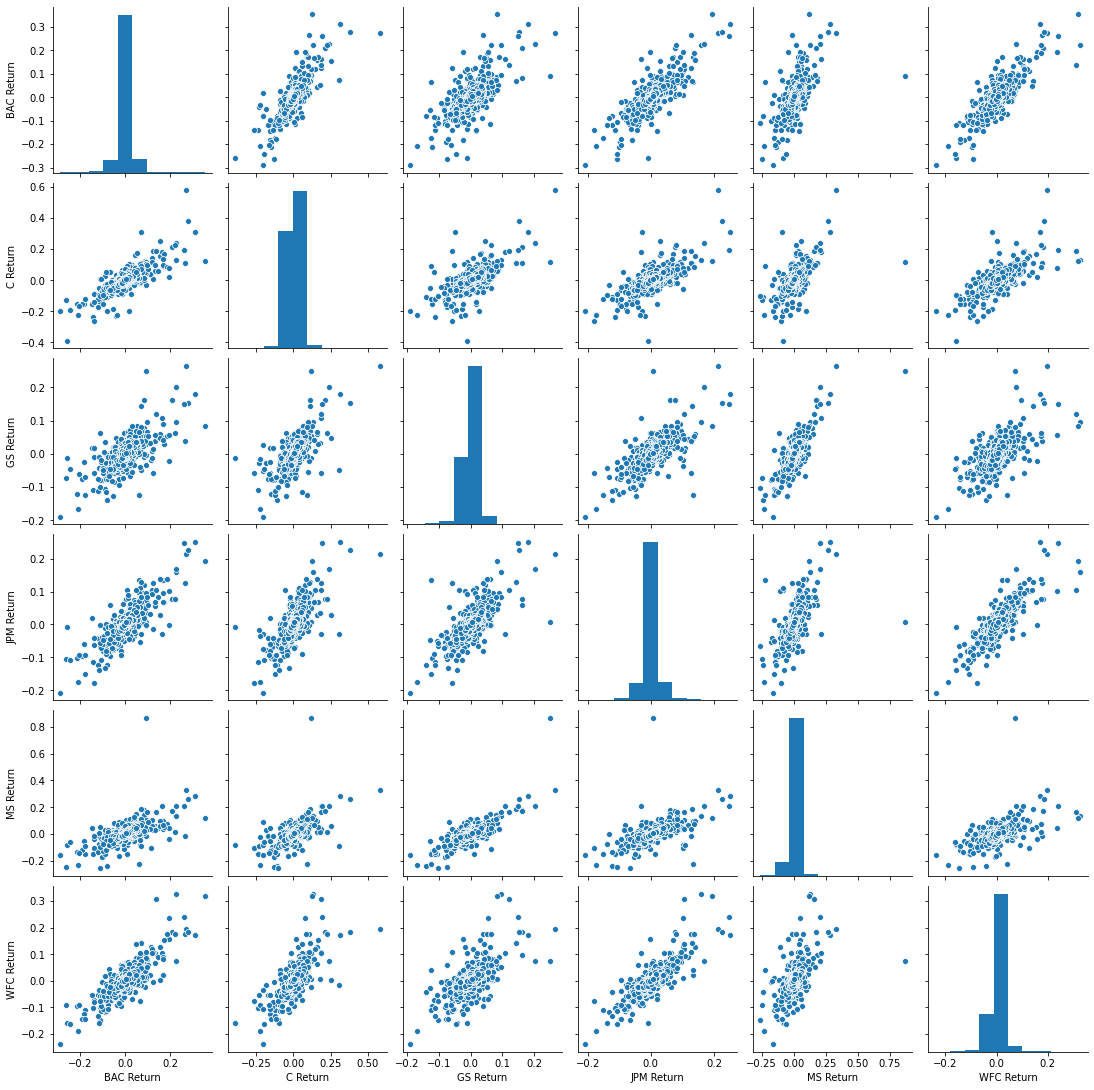

In [190]:
sns.pairplot(returns1[1:])

**Research Question: What dates each bank stock had the *best* single day returns?**

In [24]:
returns.idxmax()

Bank Ticker
BAC Returns   2009-04-09
GS Returns    2008-11-24
C Returns     2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

**Research Question: What dates each bank stock had the *worst* single day returns?**

In [25]:
returns.idxmin()

Bank Ticker
BAC Returns   2009-01-20
GS Returns    2009-02-27
C Returns     2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

**Research Question: Which stock is classified as the riskiest over the entire time period?**

In [196]:
returns.std()

Bank Ticker
BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

**Research Question: Which is classified as the riskiest for the year 2015?**

In [253]:
returns.loc['2015-01-01':'2015-12-31'].std()

Bank Ticker
BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Returns', ylabel='Count'>

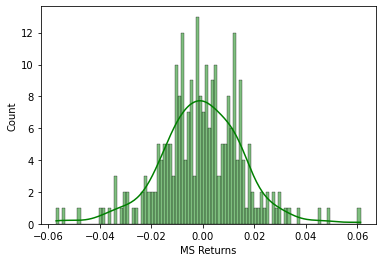

In [31]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], color = 'Green', bins = 100, kde=True)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Returns', ylabel='Count'>

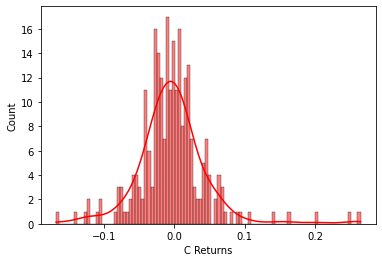

In [30]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], color = 'Red', bins = 100, kde=True)

## Moving Average for BAC (Year 2008)

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

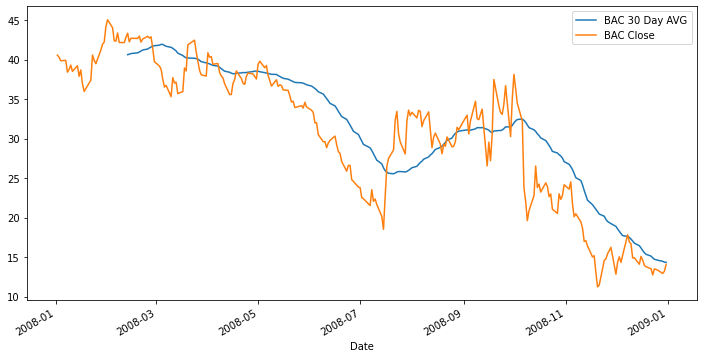

In [42]:
### Since I already have the individual dataframes imported initially, I don't need to do multilayer indexing
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = 'BAC 30 Day AVG', figsize = (12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

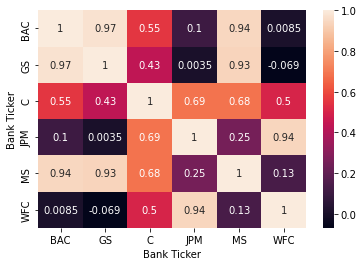

In [19]:
close = bank_stocks.xs(key ='Close', axis = 1, level = 'Stock Info')
close_corr = close.corr()
sns.heatmap(close.corr(), annot = True)

**seaborn's clustermap to cluster the correlations together**

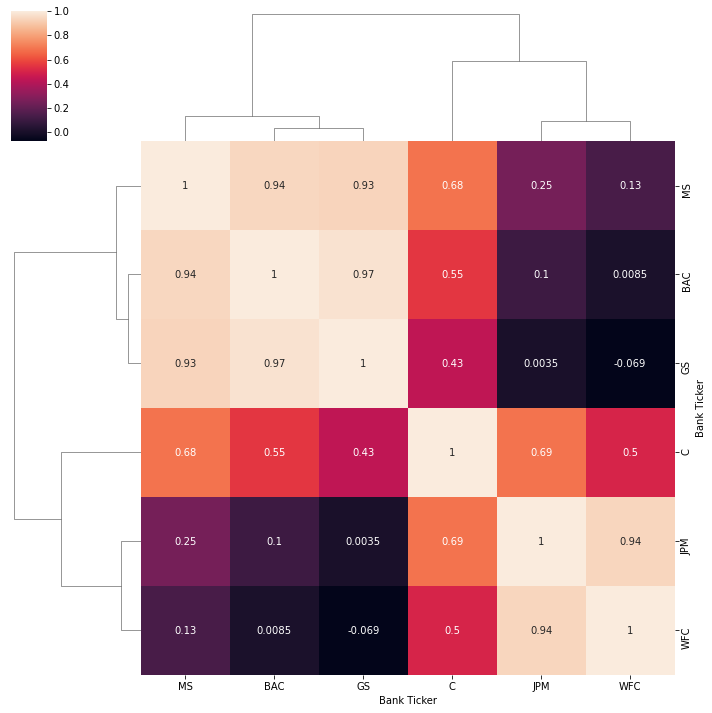

In [20]:
sns.clustermap(close.corr(), annot = True)

In [21]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Cufflinks Library (Technical Analysis Plots)


**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016**

In [18]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015**

In [19]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [20]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')